In [523]:
import pandas as pd
ticker=input("enter symbol of stock you want to analyse : ")

df = pd.read_csv("./dataset/CSV/"+ticker+".csv")
df= df.drop(['Low', 'High','Volume','Adjusted Close'], axis=1)
df
df['Stock Ticker']=[ticker]*len(df.index)

enter symbol of stock you want to analyse : YUM


In [524]:
df['50dayEWM'] = df['Open'].ewm(span=50, adjust=False).mean()
df['200dayEWM'] = df['Open'].ewm(span=200, adjust=False).mean()


In [525]:
def rsi(df, periods = 12, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi
df['rsi']=rsi(df)

In [526]:
df

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM,rsi
0,17-09-1997,5.167146,5.234543,YUM,5.167146,5.167146,NaN
1,18-09-1997,5.301941,5.414270,YUM,5.172432,5.168487,NaN
2,19-09-1997,5.403037,5.436736,YUM,5.181476,5.170821,NaN
3,22-09-1997,5.391804,5.391804,YUM,5.189724,5.173020,NaN
4,23-09-1997,5.391804,5.391804,YUM,5.197649,5.175197,NaN
...,...,...,...,...,...,...,...
6347,06-12-2022,131.190002,130.619995,YUM,120.436820,118.149070,77.194023
6348,07-12-2022,130.490005,128.270004,YUM,120.831063,118.271865,63.332848
6349,08-12-2022,128.910004,129.850006,YUM,121.147884,118.377718,67.600028
6350,09-12-2022,129.839996,127.709999,YUM,121.488751,118.491770,57.681514


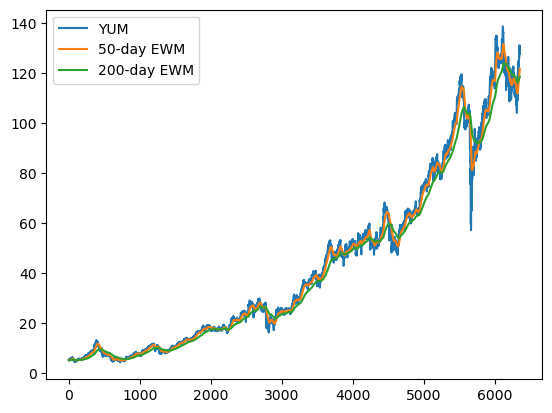

In [527]:
import matplotlib.pyplot as plt

plt.plot(df['Open'], label=ticker)
plt.plot(df['50dayEWM'], label='50-day EWM')
plt.plot(df['200dayEWM'], label='200-day EWM')
plt.legend(loc=2)



In [528]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
crossing = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200))
            | ((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))

In [529]:
crossing_dates = df.loc[crossing]


In [530]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\lxm210025\AppData\Local\Temp\ipykernel_10780\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [531]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
buys = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200)))

In [532]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
sells = (((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))


In [533]:
buy_dates = df.loc[buys]
sell_dates = df.loc[sells]
buy_dates

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM,rsi
82,1998-01-14,4.706596,4.695363,YUM,5.375738,5.384924,24.291130
470,1999-07-30,7.380032,7.312635,YUM,9.364238,9.419626,23.099715
1277,2002-10-16,7.836089,7.659957,YUM,10.125629,10.133458,22.448568
2082,2005-12-27,17.361610,17.045292,YUM,17.565778,17.567733,40.376378
2152,2006-07-04,17.343637,17.232206,YUM,17.566053,17.572243,42.311446
2226,2006-07-25,16.283249,16.445004,YUM,17.818857,17.828319,34.171147
2731,2008-07-28,24.565062,24.284687,YUM,26.255248,26.270288,37.728901
2749,2008-08-21,25.219267,25.571531,YUM,26.253794,26.262334,44.472400
2776,2008-09-30,23.371675,23.443565,YUM,26.198929,26.259238,33.336397
3870,2013-05-02,42.947521,44.629765,YUM,47.727622,47.738339,32.916593


In [534]:
buyindex=df.index[buys].tolist()
buy_dates
profit=0
loss=0
profits=[]
rsi_list=[]
for i in buyindex:
    if i>200 and i<len(df)-300 and df.loc[i]['Open'] !=0:
        buy=df.loc[i]['Open']
        for j in range(i,i+265):
            
            p=df.loc[j]['Open']-buy
            if p/buy<-0.1:                
                loss=loss+1
                profits.append(p/buy)
                rsi_list.append(df.loc[i]['rsi'])
                break
            elif p/buy>0.1:
                profit=profit+1
                profits.append(p/buy)
                rsi_list.append(df.loc[i]['rsi'])
                break
        if j-i==264:
            if buy<df.loc[j]['Open']:
                profit=profit+1
                profits.append((df.loc[j]['Open']-buy)/buy)
                rsi_list.append(df.loc[i]['rsi'])
            else :
                profit.append((df.loc[j]['Open']-buy)/buy)
                rsi_list.append(df.loc[i]['rsi'])
                loss=loss+1

In [535]:
print(profit,loss)

11 4


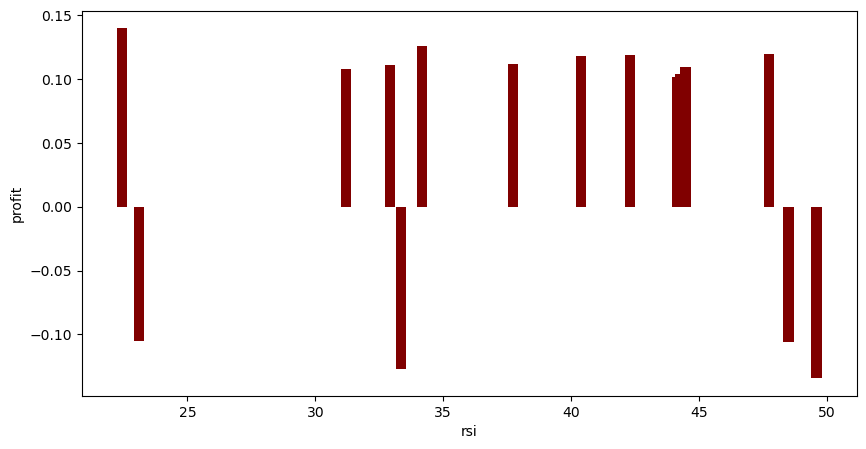

<Figure size 640x480 with 0 Axes>

In [536]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(rsi_list, profits, color ='maroon',
        width = 0.4)
 
plt.xlabel("rsi")
plt.ylabel("profit")
plt.show()
plt.savefig(ticker+'.png')

In [537]:
cap=1
for i in profits:
    cap=cap*(1+i)
print("capital invested in ",ticker, " is multiplied by ",cap-1)

capital invested in  YUM  is multiplied by  1.0081886133866393
